
## Introduction to Algorithmic Collusion

## Background
The Netherlands Authority for Consumers and Markets (ACM) is an antitrust authority. Its primary goal is to ensure fair competition and protect consumers from anticompetitive practices. With the rise of artificial intelligence (AI) and machine learning, a new challenge has emerged: algorithmic collusion. This phenomenon occurs when algorithms, designed to optimize pricing strategies, inadvertently or deliberately engage in collusive behaviour, leading to supra-competitive prices. 

## Understanding Algorithmic Collusion
Algorithmic collusion refers to the situation where pricing algorithms, often used by companies to set prices dynamically, result in higher prices than in traditional competition. Unlike human collusion, where firms explicitly agree to fix prices, algorithmic collusion can occur without any direct communication between firms. Instead, it arises from the algorithms' learning processes and their responses to market conditions. 
The outcomes of theoretical simulations of early studies reported in e.g. Calvano et al. (2020) and Klein (2021) have generated algorithmic collusion. Recently, Xavier Lambin  and co-authors have challenged these results and attributed algorithmic collusion to the simultaneous setup of the simulations, see e.g. Abada and Lambin (2023) and Lambin (2024). **The aim of this project is to use a simplified market to test these results and show when algorithmic collusion appears.** Complete all exercises in this Jupyter Notebook before starting your report. You have to hand in this assignment via Canvas, in addition to your final paper. 




## PART 0. Market Setup
To get started recall concepts from your Mathmatical Economics 1 course. 

Consider two firms (1 and 2) that produce homogenous products. Demand for each product is defined by the following function: 

$$ q_{1, t} = a - bp_{1, t} + dp_{2, t}$$

$$ q_{2, t} = a - bp_{2, t} + dp_{1, t}$$


We assume firms are self-interested profit maximizers. They will choose prices such that they maximize their profits. 

Using the demand equations above, the profit each firm earns is given by: 

$$ \pi_{1, t} = (p_{1, t} - c) q_{1, t}$$

$$ \pi_{2, t} = (p_{2, t} - c) q_{2, t}$$

The two firms meet in the market each period and can interact in different ways. 



In this part of the assignment we are going to start with our simulation environment. To create our simulation we will use object-oriented programming. Please before continuing with the assignment, if this concept is new for you, watch the following Youtube video (https://www.youtube.com/watch?v=JeznW_7DlB0). 

In [1]:
## Exercise 0.1 Import the following modules. 
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import root
import random 

In [ ]:
##  Exercise 0.2 Complete the Market class with the correct formulas from above 

In [18]:
class Market():

    '''
    Define the market with 2 firms.


    Note: In this code we account for the time dimmentions. This is not relevant 
    for the first two parts. The results will be the same each period, therefore 
    the attribute is initialized to 1. 
    '''

    def __init__(self, 
                 number_of_firms=2, 
                 number_of_periods=1):

        self.number_of_firms = number_of_firms
        self.number_of_periods = number_of_periods

        # Demand parameters
        self.A = 2
        self.b = 0.9   # own-price effect
        self.d = 0.4   # cross-price effect
        self.c = 0.5   # constant marginal cost

        self.price = np.zeros((self.number_of_firms, self.number_of_periods))
        self.quantity = np.zeros((self.number_of_firms, self.number_of_periods))
        self.profits = np.zeros((self.number_of_firms, self.number_of_periods))


    def firm1_demand(self, p1, p2):

        # Complete the function 
        return self.A - self.b * p1 + self.d * p2

    def firm2_demand(self, p1, p2):
        # Complete the function 
        return self.A - self.b * p2 + self.d * p1

    def firm1_profit(self, p1, p2):
        # Complete the function
        q1 = self.firm1_demand(p1, p2)
        return (p1 - self.c) * q1

    def firm2_profit(self, p1, p2):
        # Complete the function
        q2 = self.firm2_demand(p1, p2)
        return (p2 - self.c) * q2
    

## PART 1. Bertrand-Nash Equilibrium 

If firms strategically compete in prices in the market, they will try to best respond to the prices set by the other firm. 

This can be done both analytically and numerically. We will do both. To compute the Nash-Bertrand (NB)
equilibrium in prices we assume each firm sets its price to maximize profit, taking the other firm’s price as given.

## Exercise 1.1 

Compute the Nash Betrand Equilibirum analytically (refer to the Mathematical Economics 1 course): 

Complete all equations here. 

1. Set up the first order condition for firm 1 

$$ \max_{p_{1, t}} (p_{1, t} - c) q_{1, t} $$

$$ \frac{d\pi_1}{d p_{1, t}} =  \ldots $$
2. Set up the first order condition for firm 2 

$$ \max_{p_{2, t}} (p_{2, t} - c) q_{2, t} $$

$$ \frac{d\pi_2}{d p_{2, t}} =  \ldots $$


3. Solve the system of equations resulted from step 1 and step 2

$$ \ldots $$


Equilibiurm prices, quantities and profits: 

$$ \ldots $$


In [16]:
""" 
Exercise 1.2

Write down a child class that computes:

1. the analytical formulas 
2. the numerical Nash equilibrium for the Bertrand competition model directly from the first order conditions.


The class should inherit from the Market class.
## The class should have the following methods:
## - __init__: initializes the class with the number of firms and periods.
## - compute_analytical_equilibrium: computes the analytical Nash equilibrium.
## - compute_equilibrium_numerical: computes the numerical Nash equilibrium using the scipy.optimize.root function.

Print your solutions. 
The analytical and numerical solutions should be the same. 

"""



class Nash_Betrand(Market): 
    '''
    Nash-Bertrand competition class under symmetric linear demand.

    '''
    def __init__(self, 
                 number_of_firms=2, 
                 number_of_periods=1):
        super().__init__(number_of_firms, number_of_periods)

    def compute_analytical_equilibrium(self):

        p1_star  = (self.A + self.b * self.c) / (2 * self.b - self.d)
        p2_star  = (self.A + self.b * self.c) / (2 * self.b - self.d)

        q1_star = self.firm1_demand(p1_star, p2_star)
        q2_star = self.firm2_demand(p1_star, p2_star)

        pi1_star = self.firm1_profit(p1_star, p2_star)
        pi2_star = self.firm2_profit(p1_star, p2_star)

        for t in range(self.number_of_periods):
            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi1_star, pi2_star]

        return self.price, self.quantity, self.profits

    def compute_equilibrium_numerical(self):
        
        def foc_system(prices):
            p1, p2 = prices
            A, b, d, c = self.A, self.b, self.d, self.c

            q1 = A - b*p1 + d*p2
            dq1_dp1 = -b
            dpi1_dp1 = q1 + (p1 - c) * dq1_dp1

            q2 = A - b*p2 + d*p1
            dq2_dp2 = -b
            dpi2_dp2 = q2 + (p2 - c) * dq2_dp2

            return [dpi1_dp1, dpi2_dp2]


        for t in range(self.number_of_periods):

            initial_guess = [2.0, 2.0]
            sol = root(foc_system, initial_guess)

            if not sol.success:
                raise RuntimeError("Failed to find Nash equilibrium.")

            p1_star, p2_star = sol.x
            q1_star = self.firm1_demand(p1_star, p2_star)
            q2_star = self.firm2_demand(p1_star, p2_star)
            pi1_star = self.firm1_profit(p1_star, p2_star)
            pi2_star = self.firm2_profit(p1_star, p2_star)
            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi1_star, pi2_star]

        return self.price, self.quantity, self.profits

In [19]:
"""

Exercise 1.3

Show your two solutions.

"""

nash_market = Nash_Betrand()
result = nash_market.compute_analytical_equilibrium()
print(result)
result_numerical = nash_market.compute_equilibrium_numerical()
print(result_numerical)

(array([[1.75],
       [1.75]]), array([[1.125],
       [1.125]]), array([[1.40625],
       [1.40625]]))
(array([[1.75],
       [1.75]]), array([[1.125],
       [1.125]]), array([[1.40625],
       [1.40625]]))


## Part 2: Collusion

We consider a collusion scenario where the two firms split monopoly profit equally. 

A monopolist would serve the market by maximizing total demand: 

$$ \pi_m  = (p_m - c) Q(p_m) $$

Where $Q(p_m)$ is the total market demand as determined by the previous equations. 

## Exercise 2.1 

Analitically determine the monopolist price, quantity and profits: 

    ...
    

In [5]:
""" 
Exercise 2.2

Write down a child class that computes:

1. the analytical formulas 
2. the numerical solution for collusive outcome using the first order condition.


The class should inherit from the Market class.
## The class should have the following methods:
## - __init__: initializes the class with the number of firms and periods.
## - compute_analytical_equilibrium: computes the analytical solution
## - compute_equilibrium_numerical: computes the numerical solution using the scipy.optimize.minimize function.

Print your solutions. 
The analytical and numerical solutions should be the same. 

"""


class Collusion(Market):
    '''
    Collusion model where both firms act as a monopolist and equally share profit.
    '''
    def __init__(self, number_of_firms=2, number_of_periods=1):
        super().__init__(number_of_firms, number_of_periods)

    def compute_analytical_equilibrium(self):

        p_star = (self.A + self.c*(self.b-self.d))/(2*(self.b-self.d))
        p1_star = p2_star = p_star

        q1_star = self.firm1_demand(p1_star, p2_star)
        q2_star = self.firm2_demand(p1_star, p2_star)
        
        pi1_star = self.firm1_profit(p1_star, p2_star)
        pi2_star = self.firm2_profit(p1_star, p2_star)

        for t in range(self.number_of_periods):
            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi1_star, pi2_star]

        return self.price, self.quantity, self.profits

    def compute_equilibrium_numerical(self):
        def joint_profit(prices):
            p1, p2 = prices
            q1 = self.firm1_demand(p1, p2)
            q2 = self.firm2_demand(p1, p2)
            pi_total = (p1 - self.c) * q1 + (p2 - self.c) * q2
            return -pi_total  
        
        for t in range(self.number_of_periods):
            initial_guess = [2.0, 2.0] 
            
            sol = minimize(joint_profit, initial_guess, method='BFGS')
            if not sol.success:
                raise RuntimeError("Numerical maximization failed.")

            p1_star, p2_star = sol.x
            q1_star = self.firm1_demand(p1_star, p2_star)
            q2_star = self.firm2_demand(p1_star, p2_star)
            pi_total = (p1_star - self.c) * q1_star + (p2_star - self.c) * q2_star

            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi_total/2, pi_total/2]

        return self.price, self.quantity, self.profits

In [21]:
"""

Exercise 1.3

Show your two solutions.

"""

col_market= Collusion()
result = col_market.compute_analytical_equilibrium()
print(result)
result_numerical = col_market.compute_equilibrium_numerical()
print(result_numerical)

(array([[2.25],
       [2.25]]), array([[0.875],
       [0.875]]), array([[1.53125],
       [1.53125]]))
(array([[2.25],
       [2.25]]), array([[0.875],
       [0.875]]), array([[1.53125],
       [1.53125]]))


## Part 3: Q-learning Collusion

See lecture slides, notes and articles for a detailed explanation of Q learning. 
You have to understand and prepare before your proceed further. 



## Exercise 3.1 

Q-Learning models were developped for single-agent situations. To get acquinted with these algorithms, you first study the monopolist setting. 

The aim is that you play around with algorithm's parameters, in particular $\alpha$, $\gamma$ and $\epsilon$ from the q-formula: 

You have to present 3 graphs of the:

1.price 

2.quantity demanded 

3.profit 

evolution of the monopolist over time, as the agents learn. 

You are free to implement this as you see fit. However, you need to justify your method. 



In [ ]:
'''

Your Q-learning Monopolist algorithm

'''

In [ ]:
'''

Code for plotting the results

'''

## Your explanation here (minimum 200 - maximum 250 words).
Be clear and explicit, relate to your code.  

## Exercise 3.2

Here, you consider the multi-agent case of two firms, each performing Q-Learning. A novel aspect is how each firm has to take into account the competitor's price. 

The aim is that you play around with your intuition as well as with the algorithm's parameters ($\alpha$, $\gamma$ and $\epsilon$). Both 
firms have the same parameters for $\alpha$, $\gamma$ and $\epsilon$ for this exercise. 

You have to present 3 graphs of the:

1.price 

2.quantity demanded
 
3.profit 

evolution of the monopolist over time, as the agents learn. 

You are free to implement this as you see fit. However, you need to justify your method. 


In [ ]:
'''

Your Q-learning Monopolist algorithm

'''

In [ ]:
'''

Code for plotting the results

'''

## Your explanation here (minimum 200 - maximum 250 words).
Be clear and explicit, relate to your code.  

In [10]:
class QLearningMarket(Market):
    def __init__(self, number_of_firms=2, number_of_periods=5000, alpha=0.01, gamma=0.95, epsilon=0.1, grid_size=40):
        super().__init__(number_of_firms, number_of_periods)

        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

        self.nash_price = (self.A + self.b * self.c) / (2 * self.b - self.d)
        self.collusive_price = (self.A + (self.b - self.d) * self.c) / (2 * (self.b - self.d))

        # Create price grid
        self.price_grid = np.linspace(self.nash_price, self.collusive_price, grid_size)
        self.grid_size = grid_size

        # Q-tables: firm i learns Q[a_i, a_j] (joint-action values)
        self.Q = [np.zeros((grid_size, grid_size)) for _ in range(self.number_of_firms)]

    def choose_action(self, firm, opponent_action):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.grid_size)  
        else:
            return np.argmax(self.Q[firm][:, opponent_action])  

    def compute_q_learning_equilibrium(self):
        # Initialize previous actions arbitrarily
        last_actions = [0, 0]

        for t in range(self.number_of_periods):
            # Firms choose actions based on last opponent action
            a0 = self.choose_action(0, last_actions[1])
            a1 = self.choose_action(1, last_actions[0])
            actions = [a0, a1]
            prices = [self.price_grid[a0], self.price_grid[a1]]

            q1 = self.firm1_demand(prices[0], prices[1])
            q2 = self.firm2_demand(prices[0], prices[1])
            pi1 = (prices[0] - self.c) * q1
            pi2 = (prices[1] - self.c) * q2
            rewards = [pi1, pi2]

            self.price[:, t] = prices
            self.quantity[:, t] = [q1, q2]
            self.profits[:, t] = [pi1, pi2]

            max_q0_next = np.max(self.Q[0][:, a1])
            max_q1_next = np.max(self.Q[1][:, a0])

            self.Q[0][a0, a1] += self.alpha * (pi1 + self.gamma * max_q0_next - self.Q[0][a0, a1])
            self.Q[1][a1, a0] += self.alpha * (pi2 + self.gamma * max_q1_next - self.Q[1][a1, a0])

            last_actions = actions

            self.epsilon = max(0.01, self.epsilon * 0.999)

        return self.price, self.quantity, self.profits

In [11]:


market = QLearningMarket(number_of_periods=100000)
prices, _, _ = market.compute_q_learning_equilibrium()

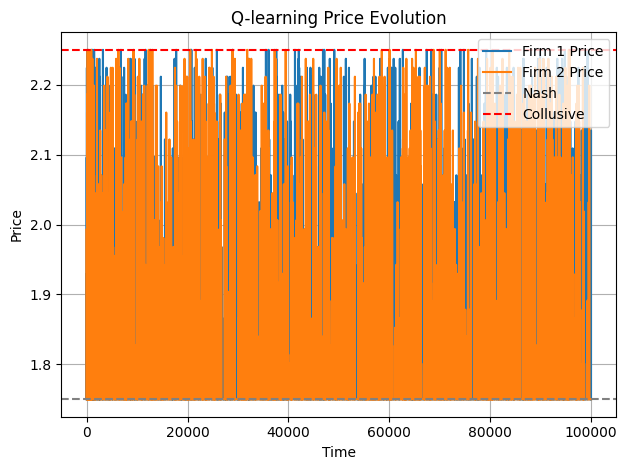

In [12]:
import matplotlib.pyplot as plt

plt.plot(prices[0], label="Firm 1 Price")
plt.plot(prices[1], label="Firm 2 Price")
plt.axhline(market.nash_price, linestyle="--", color="gray", label="Nash")
plt.axhline(market.collusive_price, linestyle="--", color="red", label="Collusive")
plt.title("Q-learning Price Evolution")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

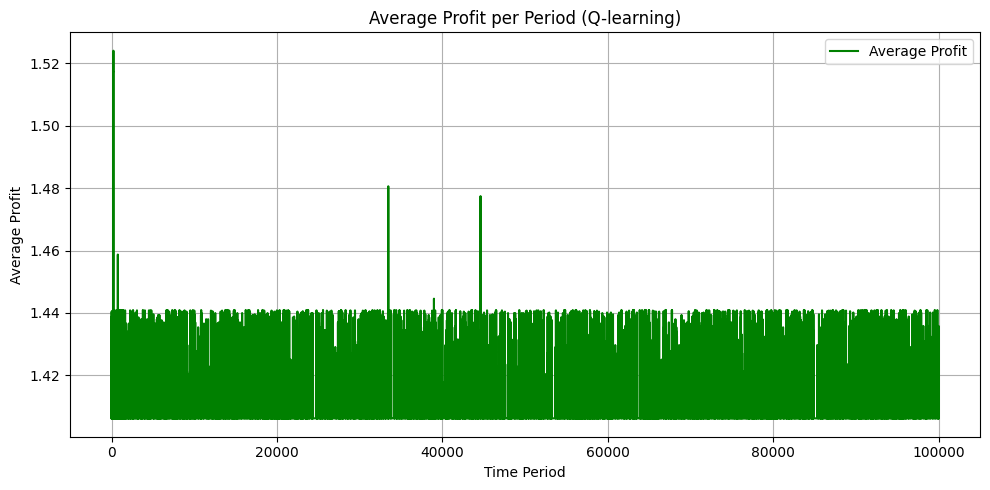

In [13]:
import matplotlib.pyplot as plt

# Compute average profit per period across the two firms
avg_profit = np.mean(market.profits, axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_profit, label="Average Profit", color='green')
plt.title("Average Profit per Period (Q-learning)")
plt.xlabel("Time Period")
plt.ylabel("Average Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## You have to use the results from this Jupyter Nontebook for your report and presentation. 
## You are free to add any extensions you see fit (example: asymmetric firms, different demand, different cost strucutre etc)


## Good luck! 

References

Abada, Ibrahim and Xavier Lambin. 2023. Artificial Intelligence: Can Seemingly Collusive Outcomes Be Avoided? Management Science 69 (9): 5042-5065. DOI: 10.1287/mnsc.2022.4623

Calvano, Emilio, Giacomo Calzolari, Vincenzo Denicolò, and Sergio Pastorello. 2020. "Artificial Intelligence, Algorithmic Pricing, and Collusion." American Economic Review 110 (10): 3267–97. DOI: 10.1257/aer.20190623

Klein, Timo. 2021. “Autonomous algorithmic collusion: Q-learning under sequential pricing.” RAND Journal of Economics 52 (3): 538-558. DOI: 10.1111/1756-2171.12383

Lambin, Xavier. 2024. Less than meets the eye: simultaneous experiments as a source of algorithmic seeming collusion. Available at SSRN: https://ssrn.com/abstract=4498926 or http://dx.doi.org/10.2139/ssrn.4498926


Assignment developed by Harold Houba and Ana Popovici